In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train), \
(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print("train data:","images:",x_img_train.shape,
     " labels:",y_label_train.shape)
print("test data:","images",x_img_test.shape,
     " labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test data: images (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
x_img_train_normalize = x_img_train.astype('float32') /255.0
x_img_test_normalize = x_img_test.astype('float32') /255.0

In [6]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))

In [12]:
model.add(Dropout(rate=0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
__________

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [19]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                       validation_split=0.2,
                       epochs=10, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 251s 6ms/step - loss: 1.6216 - acc: 0.4254 - val_loss: 1.3261 - val_acc: 0.5526
Epoch 2/10
40000/40000 [==============================] - 198s 5ms/step - loss: 1.2534 - acc: 0.5546 - val_loss: 1.1941 - val_acc: 0.5993
Epoch 3/10
40000/40000 [==============================] - 197s 5ms/step - loss: 1.1280 - acc: 0.6013 - val_loss: 1.1418 - val_acc: 0.6165
Epoch 4/10
40000/40000 [==============================] - 187s 5ms/step - loss: 1.0297 - acc: 0.6347 - val_loss: 1.0918 - val_acc: 0.6294
Epoch 5/10
40000/40000 [==============================] - 187s 5ms/step - loss: 0.9581 - acc: 0.6621 - val_loss: 1.0327 - val_acc: 0.6429
Epoch 6/10
40000/40000 [==============================] - 183s 5ms/step - loss: 0.8836 - acc: 0.6891 - val_loss: 0.9823 - val_acc: 0.6613
Epoch 7/10
40000/40000 [==============================] - 180s 4ms/step - loss: 0.8125 - acc: 0.7142 - val_loss: 0.9660 - 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

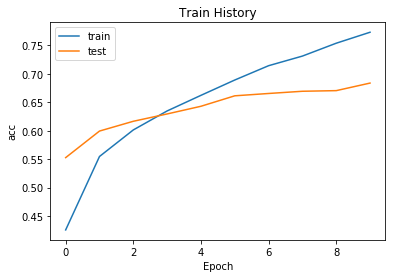

In [21]:
show_train_history(train_history,'acc', 'val_acc')

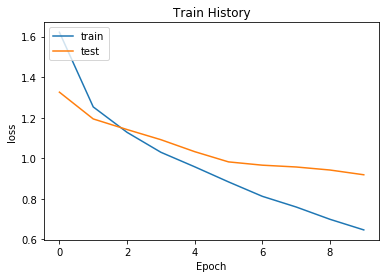

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x_img_test_normalize,
                       y_label_test_OneHot, verbose=0)
scores[1]

0.67479999999999996

In [24]:
prediction=model.predict_classes(x_img_test_normalize)

In [25]:
prediction[:10]

array([3, 8, 0, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [27]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
           5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [28]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels,
                                 prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        title= str(i)+','+label_dict[labels[i][0]]
        if len(prediction) > 0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

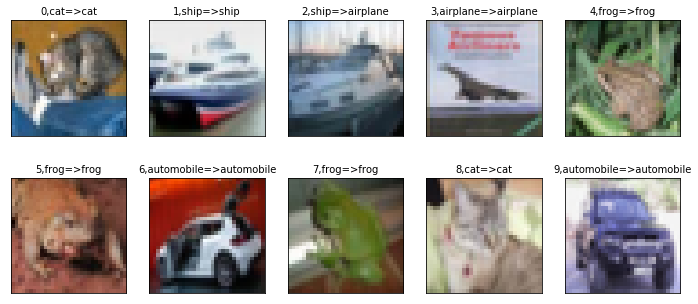

In [29]:
plot_images_labels_prediction(x_img_test,y_label_test,
                             prediction,0,10)

In [30]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [34]:
def show_Predicted_Probability(y,prediction,
                              x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
         'predict',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
             'Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict cat


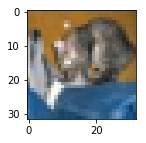

airplaneProbability:0.009549147
automobileProbability:0.000641238
birdProbability:0.012370803
catProbability:0.662585616
deerProbability:0.038216211
dogProbability:0.246632487
frogProbability:0.005293622
horseProbability:0.018589279
shipProbability:0.005936275
truckProbability:0.000185368


In [35]:
show_Predicted_Probability(y_label_test,prediction,
                          x_img_test,Predicted_Probability,0)

label: airplane predict airplane


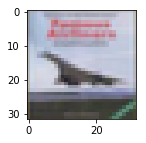

airplaneProbability:0.773710430
automobileProbability:0.015920388
birdProbability:0.046866167
catProbability:0.002883019
deerProbability:0.010950585
dogProbability:0.000072111
frogProbability:0.000557846
horseProbability:0.000435147
shipProbability:0.146646559
truckProbability:0.001957635


In [36]:
show_Predicted_Probability(y_label_test,prediction,
                          x_img_test,Predicted_Probability,3)

In [37]:
prediction.shape

(10000,)

In [38]:
y_label_test.shape

(10000, 1)

In [39]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [40]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
           rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,765,13,32,28,17,10,15,12,61,47
1,28,775,7,21,5,5,19,8,22,110
2,84,5,429,92,117,76,125,50,11,11
3,22,14,44,493,76,170,117,31,12,21
4,28,4,52,71,619,40,108,64,12,2
5,16,4,40,191,56,573,45,63,8,4
6,4,5,24,55,39,22,837,3,5,6
7,18,2,16,56,52,56,15,768,1,16
8,106,49,6,11,9,6,22,6,739,46
